# Laptop price prediction

# with lecture help

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('laptop.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.columns
# first column is unnamed(contains only the indices), we must remove

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [4]:
# dropping the first column which is unnamed.
df = df.drop(df.columns[0], axis = 1)

In [5]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [6]:
#checking the duplicate rows
df.duplicated().sum()

29

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [8]:
 # separating the categorical and numerical features.
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include=['int32','int64','float32','float64']).columns
catvars,numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

In [9]:
#finding the unique values in each columns.
for features in df.columns:
    print(features,'\n', df[features].unique(),'\n') #'\n' is used to give new line

Company 
 ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG'] 

TypeName 
 ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation'] 

Inches 
 [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3] 

ScreenResolution 
 ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touchscreen 2256x1504'
 'Quad HD+ / Touchscreen 3200x1800' 'IPS Panel 1366x768'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840x2160'
 'Touchscreen 2560x1440' '1600x900' 'IPS Panel 4K Ultra HD 3840x2160'
 '4K U

# observations

on removing the GB from the RAM, we can convert it to integer.
same with the memory and weight.

In [10]:
# RAM : 8GB --> 8.
df['Ram'] = df['Ram'].str.split('G').str[0].astype(int)


In [11]:
#weight
df['Weight'] = df['Weight'].str.split('k').str[0].astype(float)

In [12]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


# Exploratory Data Analysis

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

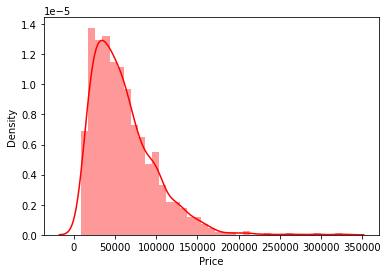

In [13]:
# Viewing the distribution of price columns
import seaborn as sn
sn.distplot(df['Price'],color='red')

In [14]:
# the prices are left skewed Gaussian distribution, needs to be transformed.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

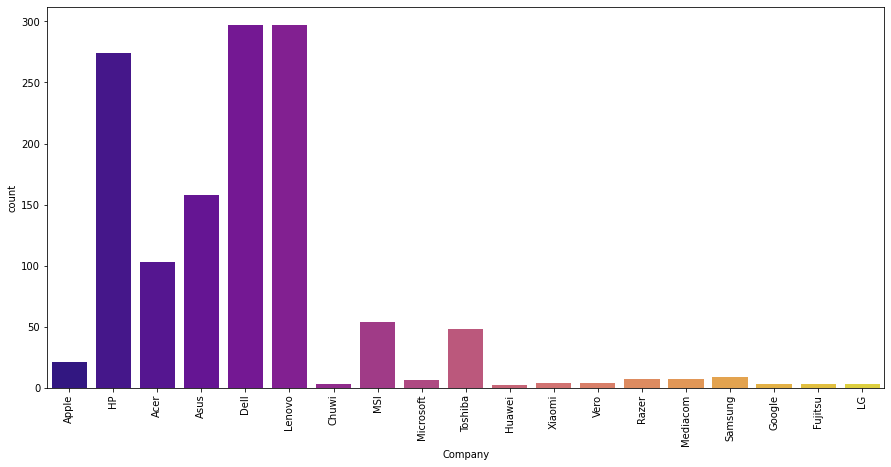

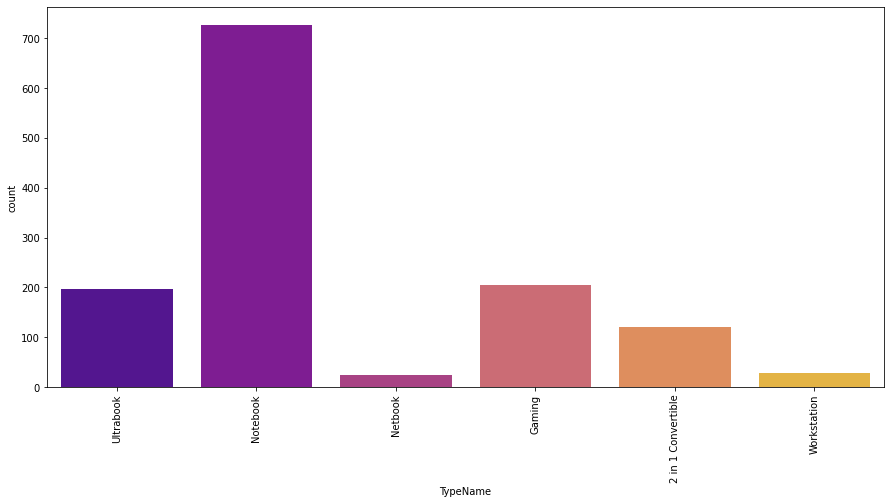

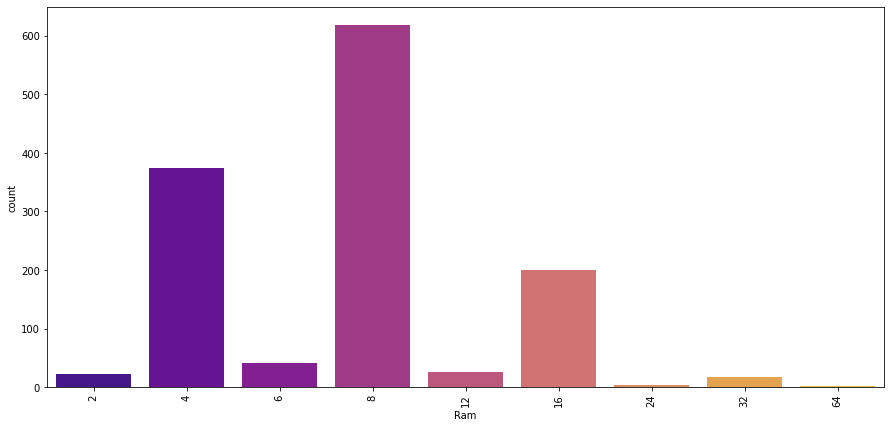

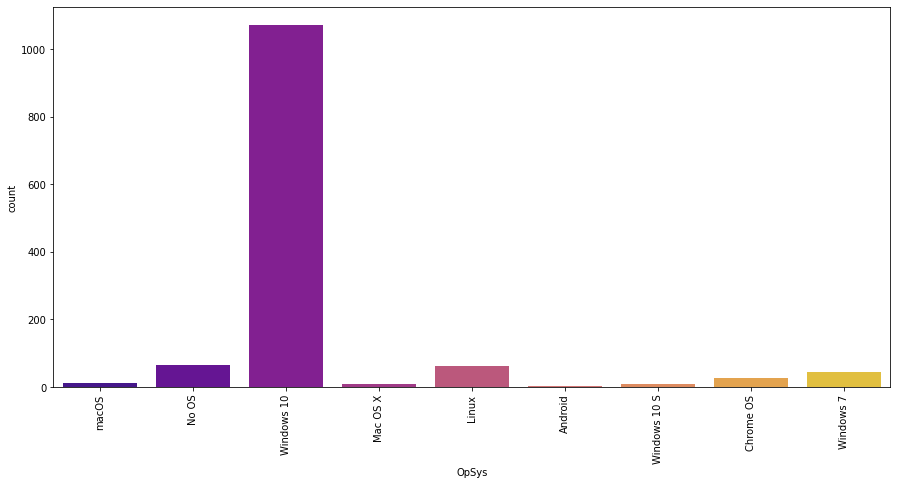

In [15]:
# plotting counteplots for the categorical varibales.
def drawplot(col):
    plt.figure(figsize =(15,7))
    sn.countplot(df[col],palette ='plasma')
    plt.xticks(rotation ='vertical') # for vertical x- labelling

topview = ['Company','TypeName','Ram','OpSys']
for col in topview:
    drawplot(col)

observations:
    1. hp, lenevo has the maximum no of laptop, Google, lg ... have the least.
    2. Notebook type are mostly sold. 

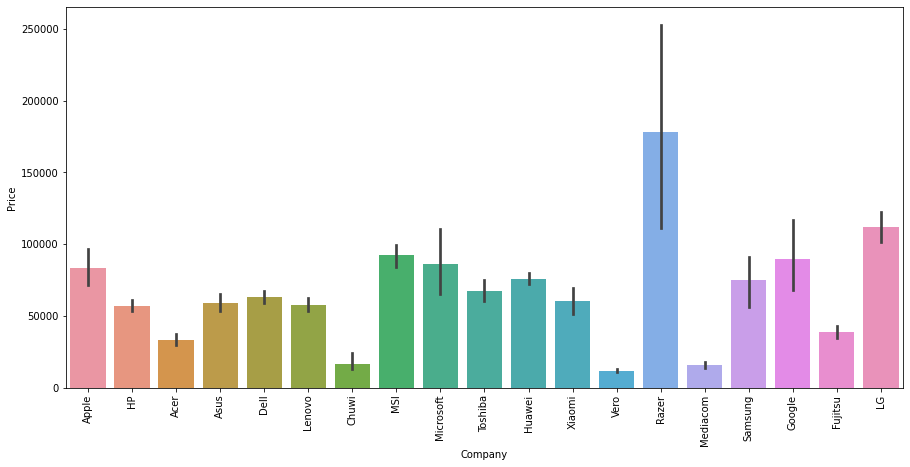

In [16]:
# how the average price of laptop varies with the company 
# + the confidence intervals.
plt.figure(figsize=(15,7))
sn.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

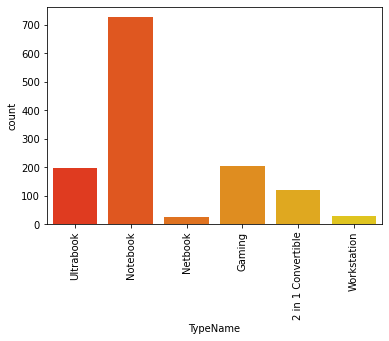

In [17]:
#various types of laptops.
sn.countplot(df['TypeName'],palette='autumn')
plt.xticks(rotation='vertical')

In [18]:
# notebook is sold in maximum number, workstation is among the least.

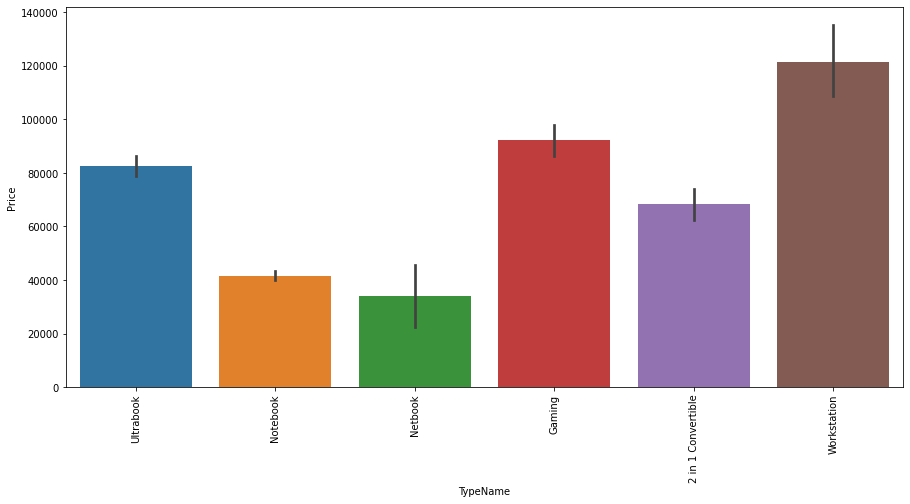

In [19]:
# how the average price of type of laptop varies with price
# + the confidence intervals.
plt.figure(figsize=(15,7))
sn.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

# so comparing each of the dependent variable with the dependent gives alot of insight.

In [20]:
#Price V/s Inches.

<AxesSubplot:xlabel='Inches', ylabel='Price'>

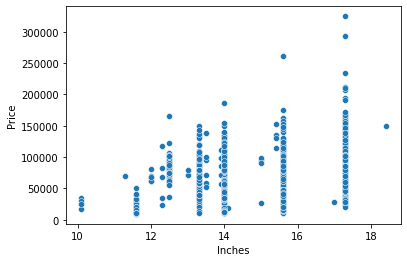

In [21]:
sn.scatterplot(x=df['Inches'],y=df['Price'])

In [22]:
# from the above plot we see that most of the laptop size vary in the range 13 to 14 inches. 

 For the Screen resolution columns, we have many types of screen resolution, Touch Screen, normal, and IPS panel
are the 3 types on the basis of which we can separate them into different columns.

In [23]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [24]:
#let's create another column for touchscreen (0/1)
# applying lambda fuction(for loop) for looping over all the columun and apply the conditions.
df['TouchScreen']=df['ScreenResolution'].apply(lambda element:1
                                               if 'Touchscreen' in element else 0)
#if touchscreen present - 1.

In [25]:
df.sample(2)
# randomly selecting rows.

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
819,Dell,Notebook,14.0,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.76,40226.40,0
788,Acer,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.20,122490.72,0


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TouchScreen', ylabel='count'>

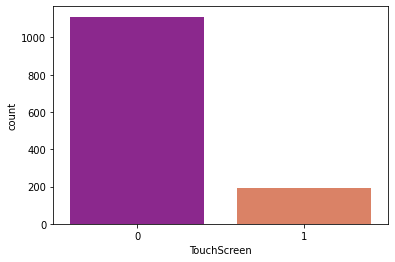

In [26]:
# count plot for each type of touchscreen
sn.countplot(df['TouchScreen'],palette = 'plasma')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

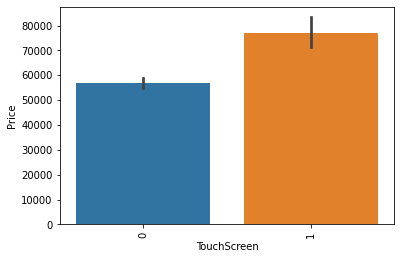

In [27]:
# comparing the price for the touchscreen
sn.barplot(x=df['TouchScreen'],y=df['Price'])
plt.xticks(rotation = 'vertical')

1. most of the touchscreen price range in (80k-70k), and for non-touchscreen its lesser(obviously)
2. the price fluctuation for normal type laptop is less(they need to keep fixed price-->demand more), but for touchscreen its more(demand->less so fluctuation occur)

In [28]:
# IPS panel column.
df['IPS'] = df['ScreenResolution'].apply(lambda element:1
                                        if 'IPS Panel' in element else 0)

In [29]:
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
1277,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,Linux,2.40,15397.92,0,0
647,Razer,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,138474.72,0,0


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IPS', ylabel='count'>

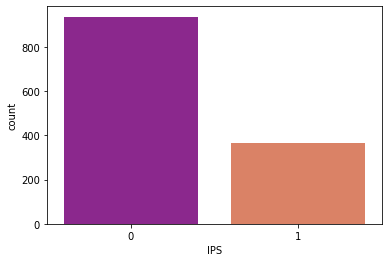

In [30]:
# count plot for each of the IPS panel(0 or 1)
sn.countplot(df['IPS'],palette='plasma')

In [31]:
# the count for ips panel are lesser

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

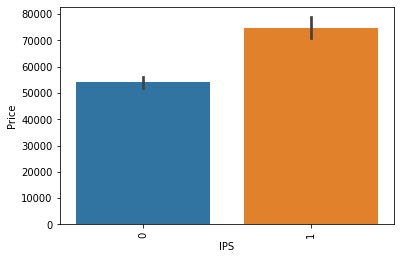

In [32]:
# variation of ips panel price.
sn.barplot(x = df['IPS'], y = df['Price'])
plt.xticks(rotation = 'vertical')

Clearly the price for IPS panel is higher and its confidence interval is larger comparision to the NON_IPS screen

# Extracting the X and Y - Resolutions for screen

In [33]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0


In [34]:
# splits the string at 'x', into max of 1 split and expands the result to separate columns== true.
splitdf= df['ScreenResolution'].str.split('x',n=1,expand=True)
splitdf.head(6)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
5,1366,768


In [35]:

df['x_res'] = splitdf[0]
df['y_res'] = splitdf[1]

In [36]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600


In [37]:
# extracting resolution from x_res.

In [38]:
df['x_res'] = df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [39]:
df.head(2)
#x_res and y_res got separated.

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


In [40]:
# converting the x_res and y_res to integers.
df['x_res'] = df['x_res'].astype(int)
df['y_res'] = df['y_res'].astype(int)

# cooreation matrix

<AxesSubplot:>

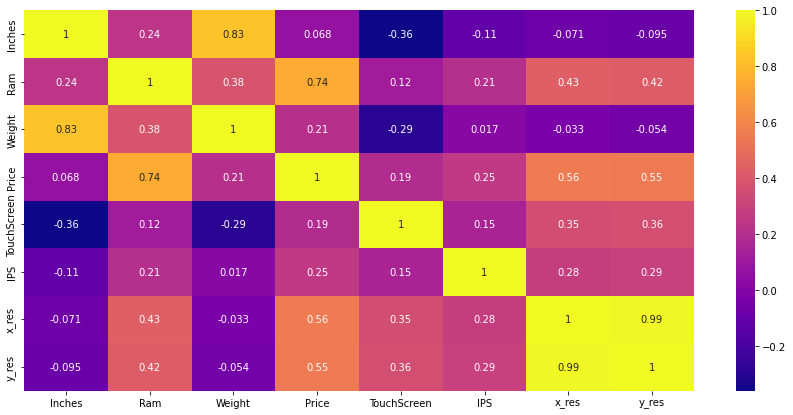

In [41]:
plt.figure(figsize =(15,7))
sn.heatmap(df.corr(),annot=True,cmap = 'plasma')

In [42]:
# let's see the correlation of price with different features.
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

we see that inches is having very less coorelation and x_res/y_res are in multicollinearity --> so can we make a single features out of them. 
Yes---> there is PPI (pixel per inch).


$$PPI(pixelsperinch) = sqrt[(X_(res))^2 + Y_((res))^2)]/(inches) $$

In [43]:
df['PPI'] = (((df['x_res']**2 + df['y_res']**2))**0.5/df['Inches']).astype('float')

In [44]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,x_res,y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940


In [45]:
df.corr()['Price']
# made a goood features (x_res + y_res + Inches) ==> PPI

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

In [46]:
# getting rid of used features.
df.drop(columns = ['Inches','x_res','y_res','ScreenResolution'], inplace = True)
# or use columns = ['', '', ] if you don't want to mention the axis =1 

In [47]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


 Now we need to work on the CPU column, also that also has lot of text 
and each one of them could be important. So, we must process them efficiently.

In [48]:
len(df['Cpu'].unique())

118

In [49]:
# so we have around 118 different types of cpu.

In [50]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [51]:
# how the join function is working below.
text  = "Intel Core i5 7200U 2.5GHz"
text.split()

['Intel', 'Core', 'i5', '7200U', '2.5GHz']

In [52]:
# so we are interested only in the first 3 parts.

In [53]:
' '.join(text.split()[:3])
# joined with some space in between

'Intel Core i5'

In [54]:
text

'Intel Core i5 7200U 2.5GHz'

In [55]:
# using lambda function in place of for loop.
# here, for every df[cpu] this function is applied.
df['CpuName'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))

In [56]:
#here, we are just using if else condition to assign 'Other Intel Processor' or 'AMD Processor'.
# text.split()[0]--> extract the first word --> if it is Intel --> belong to 'Other Intel Processor'
def processortype(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
    

df['CpuName'] = df['CpuName'].apply(lambda text:processortype(text))


In [57]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuName
432,Lenovo,Notebook,Intel Core i3 7130U 2.7GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.70,31914.720,0,1,157.350512,Intel Core i3
821,Toshiba,Ultrabook,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.25,58075.200,0,0,111.935204,Intel Core i5
55,Dell,Notebook,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD Radeon 520,Windows 10,2.13,40908.384,0,0,141.211998,Intel Core i7


In [58]:
#let's try to visualize those different cpu categories.
# count of all the cpu processors.


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


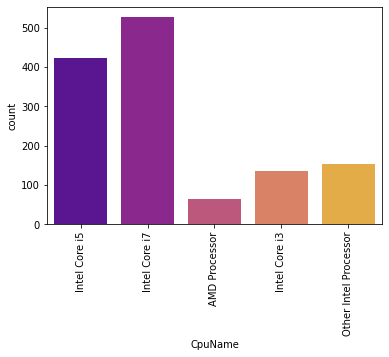

In [59]:
sn.countplot(df['CpuName'],palette='plasma')
plt.xticks(rotation = 'vertical')
plt.show()

In [60]:
# we can see that i7 is having the maximum type around = 500

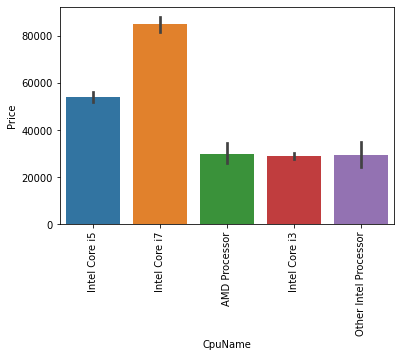

In [61]:
# visualizing cpuName vs price
sn.barplot(x=df['CpuName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
# dropping the used cpu column.
df.drop('Cpu',axis = 1, inplace =True)

In [63]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuName
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5


# Processing the "Ram" column

In [64]:
df['Ram'].unique()
# so ram categories are fixed.

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ram', ylabel='count'>

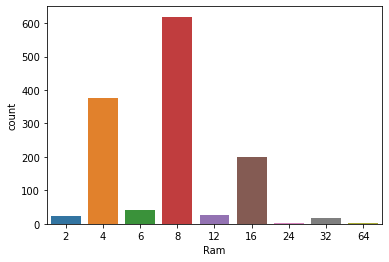

In [65]:
#visualizing the count of each ram category.
sn.countplot(df['Ram'])


In [66]:
# 8GB ram is being sold maximum around 600, 
# 4GB --> 400
# rest --> contributing to the total.

<AxesSubplot:xlabel='Ram', ylabel='Price'>

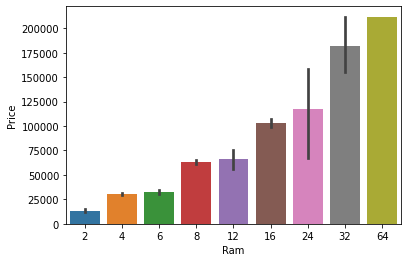

In [67]:
#visualizing the ram vs price
sn.barplot(x=df['Ram'],y=df['Price'])


In [68]:
# so we say that the ram has high correlation with price.
# so it is very important feature.
# most of the common people use 4GB and 8GB ram (less fluctuation)

# Memory column

In [69]:
df['Memory'].iloc[:1][0]

'128GB SSD'

In [70]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [71]:
# 4 most important variants observed are: ssd, hdd, flash, hybrid.
#remove 1.0 TB with 1TB 
df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)

'.\0' is replaced with only ''(space), regex = True --> for all the cells.

In [72]:
#replace the GB with " " : '128GB' --> '128'
df['Memory'] = df['Memory'].str.replace('GB','')

# replace the TB word with "000" --> convert 1TB = 1000GB.
df['Memory'] = df['Memory'].str.replace('TB','000')

#split the word across the '+' character.
newdf = df['Memory'].str.split('+',n=1,expand=True)
newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [73]:
# we will strip up all the white spaces.
# in newdf we were having spaces after it was separated from the the '+' sign.
df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuName,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [74]:
# creating separate columns for sdd, hdd, hybrid, flash storage ( 0/1) so that later they can be used to calculate the total storage.

#-------------function-----------
# it will assign 1 if the HDD/SSD/Hybrid/Flash.. is present in df['first'] else 0.
def applychanges(value):
    df['layer1'+value]=df['first'].apply(lambda x:1 if value in x else 0)

#-------calling the function---------
# it is calling each of HDD,...... and will apply changes for each of them.
listStorage = ['HDD','SSD','Hybrid','FlashStorage']
for value in listStorage:
    applychanges(value)
    
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuName,first,layer1HDD,layer1SSD,layer1Hybrid,layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [75]:
# removing all the characters from 'first' column
# '' repalce the char with no space.
df['first'] = df['first'].str.replace(r'\D','')
df['first'].value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_11660\2332804210.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D','')


256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: first, dtype: int64

In [76]:
# now targetting the memory having both types SSD+HDD...
df['second'] = newdf[1]
df['second'].value_counts()

  1000 HDD       185
  2000 HDD        15
  256 SSD          3
  500 HDD          2
  1000 Hybrid      2
  512 SSD          1
Name: second, dtype: int64

In [77]:
# applying changes to 'second' column same as 'first'

#----------- giving 1 to layer2HDD... if HDD is present else 0.
def applyChanges2(value):
    df['layer2'+value] = df['second'].apply(lambda x:1 if value in x else 0)

#-----second list will also be havving these memory types.---
listStorage2 = ['HDD','SSD','Hybrid','FlashStorage']
#--since most of the second cells would be empty.
df['second'] = df['second'].fillna("0")
for value in listStorage2:
    applyChanges2(value)

In [78]:
# removing all the characters from second columns
#---replace with empty space
df['second'] = df['second'].str.replace(r'\D','')


C:\Users\HP\AppData\Local\Temp\ipykernel_11660\3798078154.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D','')


In [79]:
df['second'].value_counts()

0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: second, dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   object 
 1   TypeName            1303 non-null   object 
 2   Ram                 1303 non-null   int32  
 3   Memory              1303 non-null   object 
 4   Gpu                 1303 non-null   object 
 5   OpSys               1303 non-null   object 
 6   Weight              1303 non-null   float64
 7   Price               1303 non-null   float64
 8   TouchScreen         1303 non-null   int64  
 9   IPS                 1303 non-null   int64  
 10  PPI                 1303 non-null   float64
 11  CpuName             1303 non-null   object 
 12  first               1303 non-null   object 
 13  layer1HDD           1303 non-null   int64  
 14  layer1SSD           1303 non-null   int64  
 15  layer1Hybrid        1303 non-null   int64  
 16  layer1

In [81]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,layer1HDD,layer1SSD,layer1Hybrid,layer1FlashStorage,second,layer2HDD,layer2SSD,layer2Hybrid,layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


In [82]:
# changing to integer type.
df['first']=df['first'].astype(int)
df['second']=df['second'].astype(int)

In [83]:
#----multiplying the elements and storing the result in separate New columns
df["HDD"]= df["first"]*df["layer1HDD"] + df["second"]*df["layer2HDD"]
df['SSD']=df['first']*df['layer1SSD'] + df['second']*df['layer2SSD']
df['Hybrid']=df['first']*df['layer1Hybrid']+df['second']*df['layer2Hybrid']
df['FlashStorage']=df['first']*df['layer1FlashStorage'] +df['second']*df['layer2FlashStorage']


In [84]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,layer1FlashStorage,second,layer2HDD,layer2SSD,layer2Hybrid,layer2FlashStorage,HDD,SSD,Hybrid,FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
## dropping the used columns (unnecessary)
df.drop(columns = ['Memory','first','layer1SSD','layer1HDD','layer1Hybrid', 'layer1FlashStorage', 'second', 'layer2HDD', 'layer2SSD',
        'layer2Hybrid','layer2FlashStorage'], inplace =True)

In [86]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuName,HDD,SSD,Hybrid,FlashStorage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [87]:
# let's see new correlation now.
#---correlation of Price v/s others.
df.corr()['Price']

Ram             0.743007
Weight          0.210370
Price           1.000000
TouchScreen     0.191226
IPS             0.252208
PPI             0.473487
HDD            -0.096441
SSD             0.670799
Hybrid          0.007989
FlashStorage         NaN
Name: Price, dtype: float64

In [88]:
# gettin rid of 'Hybrid' and 'FlashStorage' since they are having very less positive correlation.
df.drop(columns= ['Hybrid','FlashStorage'],inplace=True)


In [89]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuName,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


# Gpu extraction

In [90]:
# printing the first cell value of 'Gpu' column
a = df['Gpu'].iloc[0]
a

'Intel Iris Plus Graphics 640'

In [91]:

df['Gpu_brand']=df['Gpu'].apply(lambda x: x.split()[0])

In [92]:
df['Gpu_brand'].unique()
#printing the types of brand.

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu_brand', ylabel='count'>

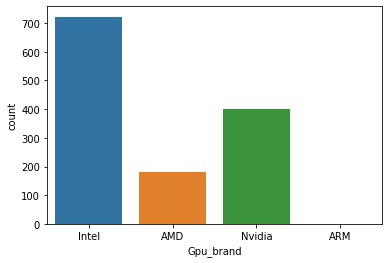

In [93]:
sn.countplot(df['Gpu_brand'])

In [94]:
# we can see that "Intel", "Nvidia" are some famous Gpu used.
# "ARM" can be got rid of

In [95]:
#----How to get rid of a particular category -------
df = df[df['Gpu_brand']!='ARM']

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu_brand', ylabel='count'>

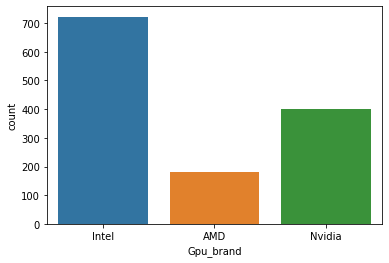

In [96]:
sn.countplot(df['Gpu_brand'])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'Intel'), Text(1, 0, 'AMD'), Text(2, 0, 'Nvidia')])

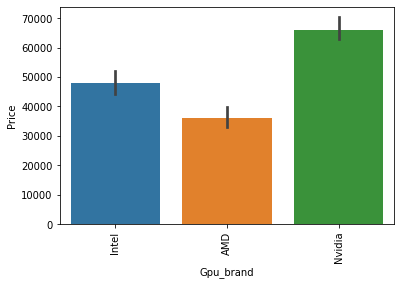

In [97]:
# Price-GPU analysis, using 'median' as price estimator.
sn.barplot(df['Gpu_brand'],df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')

In [98]:
# we can see that 'Nvidia' gpu is having the max price 
# dropping the 'Gpu' column.
df.drop('Gpu',axis =1 ,inplace=True)

In [99]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuName,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


# operating system analysis

In [100]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [101]:
# windows 10 is having the maximum number of system type.
# may be we can map them by priority 

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


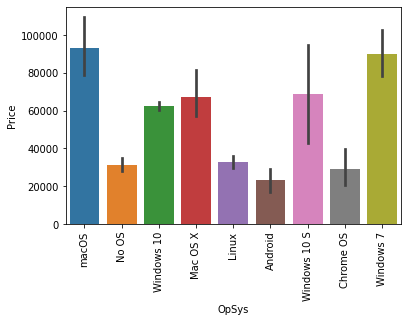

In [102]:
# visualizing the operating systems.
sn.barplot(df['OpSys'],df['Price'])
plt.xticks(rotation='vertical')
plt.show()


In [103]:
# Separting the operating systems in 3 categories: Windows, Mac, Others.
#--clubing {windows 10, 7,5}-->Windows.
#-- {macOs, mac os x}---> Mac
#_-- rest to ---> Others.



In [104]:
# ----function defining--------
def setcategory(x):
    if x == 'Windows 10' or x=='Windows 7' or x=='Windows 10 S':
        return 'Windows'
    elif x=='Mac OS x' or x=='macOS':
        return 'Mac'
    else:
        return 'Others'

    
#-----------function creation ---------
# looping using lambda fuction, to rewrite the category of each ops system.
df['OpSys'] = df['OpSys'].apply(lambda x: setcategory(x))


In [105]:
df.sample(3)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuName,HDD,SSD,Gpu_brand
556,Mediacom,Notebook,4,Windows,1.35,13586.40,0,1,165.632118,Other Intel Processor,0,0,Intel
364,Lenovo,Notebook,8,Others,2.20,26586.72,0,0,100.454670,Intel Core i3,0,256,Nvidia
875,Dell,Ultrabook,8,Windows,1.60,90043.20,0,0,176.232574,Intel Core i7,0,256,Intel


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OpSys', ylabel='count'>

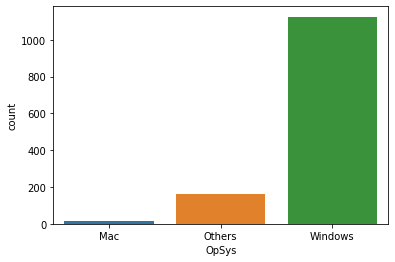

In [106]:
# examining the statistical realtion of these new category in operating systems.
sn.countplot(df['OpSys'])


In [107]:
# so clearly Windows is leading the market.


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OpSys', ylabel='Price'>

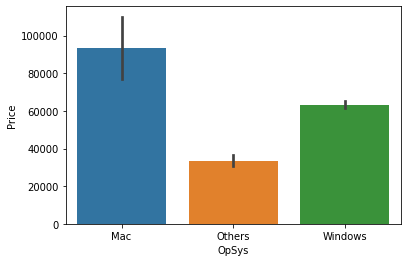

In [108]:
# visualizing their relation with price
sn.barplot(df['OpSys'],df['Price'])

In [109]:
# we find that windows is in most people reach, its price is less and has constant price.
# for Mac the price is more and its fluctuaion is also more.(may be because of fluctuation in demand--> price has to be increased/decreased.)

# Weight Analysis

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

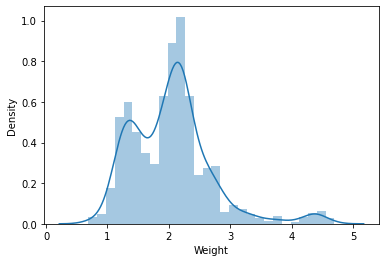

In [110]:
# plotting the distribution of Weight
sn.distplot(df['Weight'])

In [111]:
# plot is sometype of gaussian distributed.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight', ylabel='Price'>

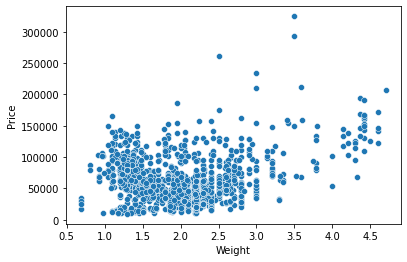

In [112]:
sn.scatterplot(df['Weight'],df['Price'])

In [113]:
# most of the laptop is around 1 to 2 kg with price varying around 40k to 1 lakh.

# Price Analysis

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

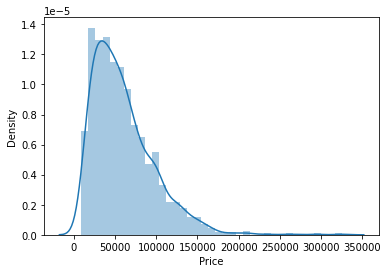

In [114]:
# plotting the distribution of price.
sn.distplot(df['Price'])

In [115]:
# clearly we see that the price is left skewed.
# we can use some transformation techniques to make it well behaved.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

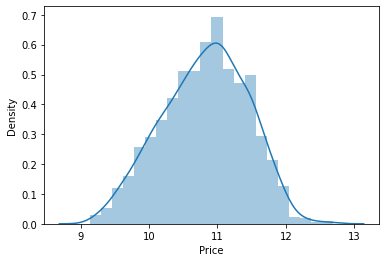

In [116]:
# using log transformation
sn.distplot(np.log(df['Price']))

In [117]:
# now its following better gaussian distribution.

In [118]:
# finally let's see the correlation of features with Price.
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:>

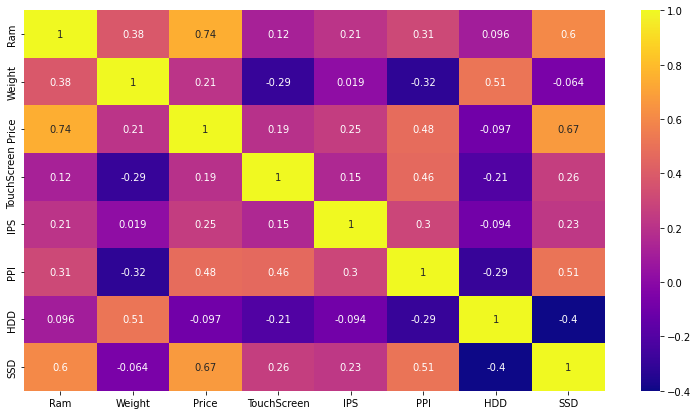

In [120]:
plt.figure(figsize=(13,7))
sn.heatmap(df.corr(),annot=True,cmap='plasma')

In [125]:
# saving the processed data as new csv file, without creating any index column.
df.to_csv('laptop_eda_final.csv',index=False)